In [1]:
from moseq2_detectron_extract.io.session import Session
import matplotlib.pyplot as plt
import numpy as np
import cv2

from moseq2_detectron_extract.proc.proc import prep_raw_frames, clean_frames, get_frame_features


In [2]:
session = Session(r"D:\moseq-extract-testing\test_2animal_full_timecourse\20MOS08-F\session_20200824122748.tar.gz")
first_frame, bground_im, roi, true_depth = session.find_roi()

In [3]:
def plot_frames(frames, idxs, cols=5, fig_size=(20,20), vmin=0, vmax=100):
    cols = int(cols)
    rows = int(np.ceil(frames.shape[0] / cols))
    fig, axs = plt.subplots(rows, cols, sharex=True, sharey=True, figsize=fig_size)
    
    for i, ax in enumerate(axs.flat):
        ax.imshow(frames[i], vmin=vmin, vmax=vmax)
        ax.set_title(idxs[i])
    fig.tight_layout()
    
def plot_contours(frames, contours, idxs, cols=5, fig_size=(20,20), vmin=0, vmax=100):
    cols = int(cols)
    rows = int(np.ceil(frames.shape[0] / cols))
    fig, axs = plt.subplots(rows, cols, sharex=True, sharey=True, figsize=fig_size)
    norm = plt.Normalize(vmin, vmax)
    cmap = plt.get_cmap('jet')
    
    disp_img = frames.copy().astype('float32')
    disp_img = (disp_img-vmin)/(vmax-vmin)
    disp_img[disp_img < 0] = 0
    disp_img[disp_img > 1] = 1
    disp_img = cmap(disp_img)[:,:,:,:3]*255
    
    for i, ax in enumerate(axs.flat):
        cv2.drawContours(disp_img[i], [contours[i]], -1, (0,255,255), 1)
        ax.imshow(disp_img[i])
        ax.set_title(idxs[i])
    fig.tight_layout()

In [4]:
frames_of_interest = range(18520, 18545)
frame_idxs, raw_frames = next(session.index(frames_of_interest))

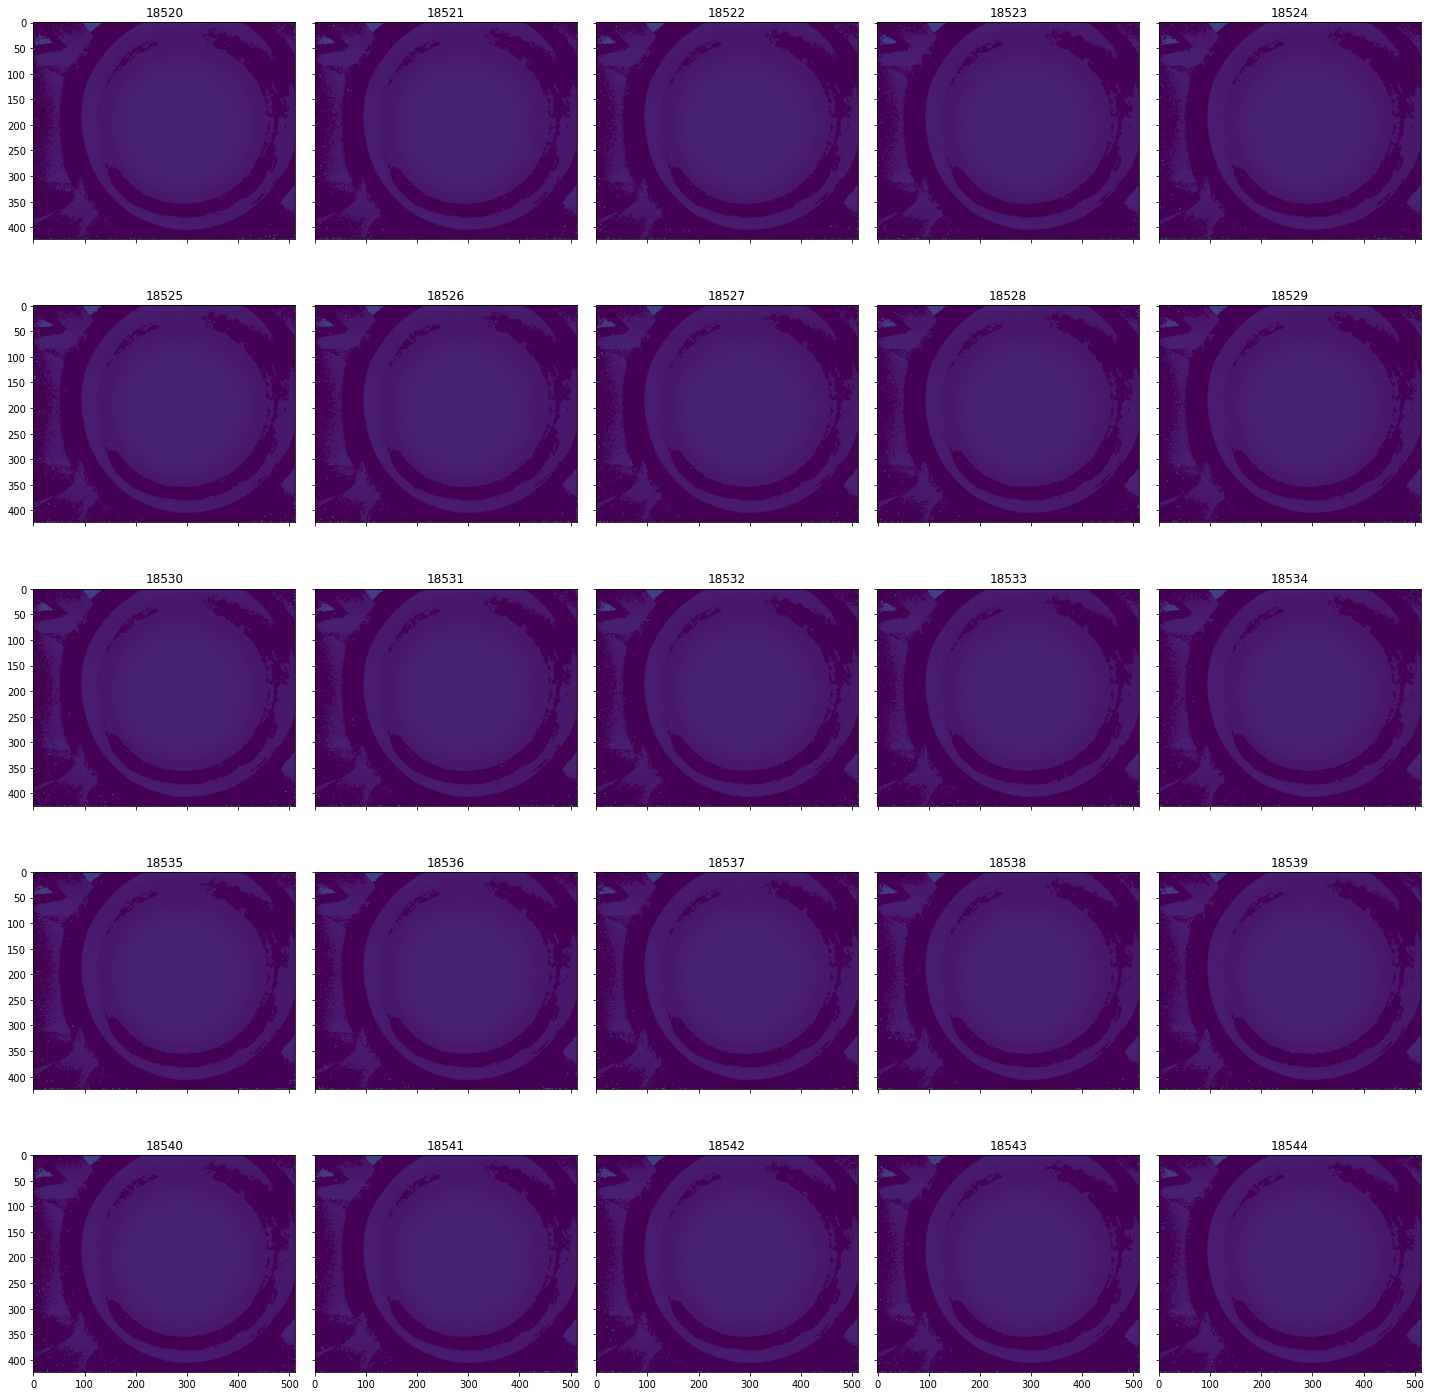

In [5]:
plot_frames(raw_frames, frame_idxs, vmin=None, vmax=None)

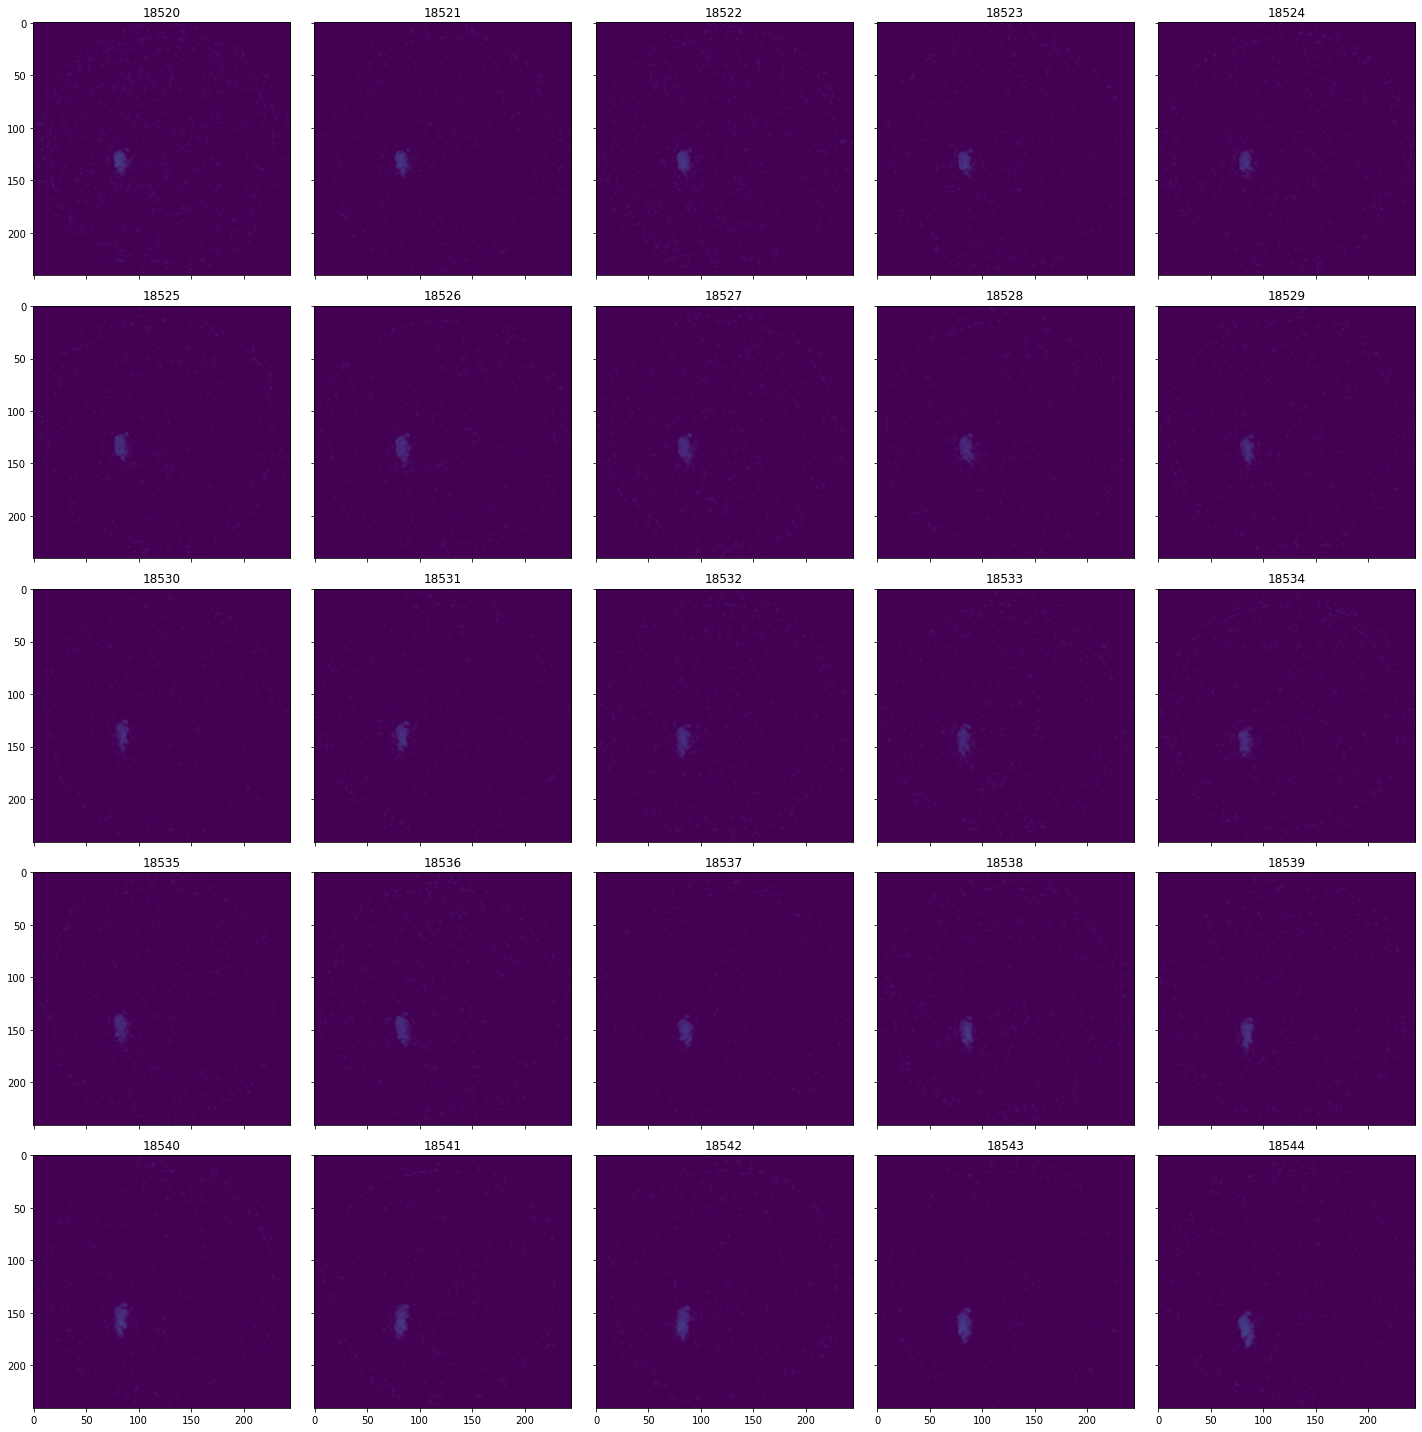

In [5]:
raw_frames = prep_raw_frames(raw_frames, bground_im=bground_im, roi=roi, vmin=0, vmax=100)
plot_frames(raw_frames, frame_idxs, vmin=0, vmax=100)

Cleaning frames: 100%|███████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 2940.56it/s]


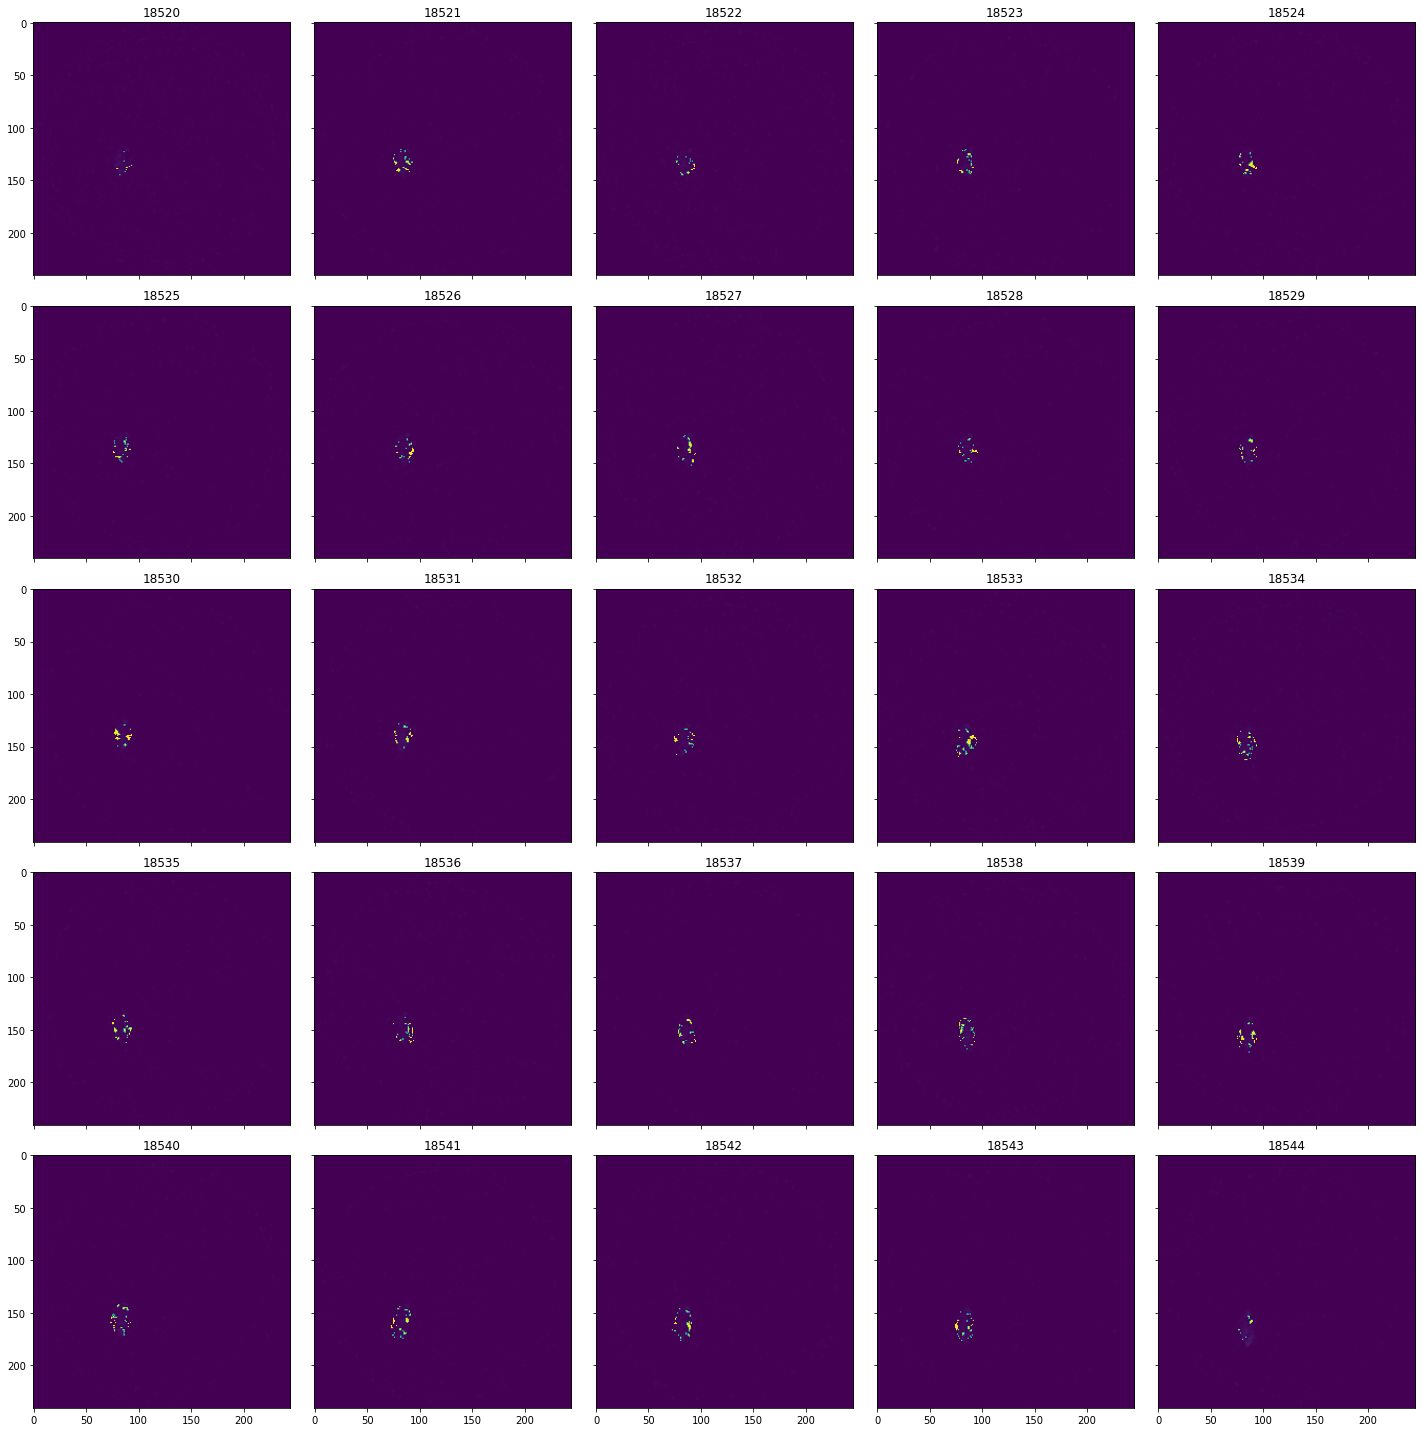

In [17]:
cleaned_frames = clean_frames(raw_frames, iters_tail=3, prefilter_time=(3,))
plot_frames(raw_frames - cleaned_frames, frame_idxs, vmin=None, vmax=None)

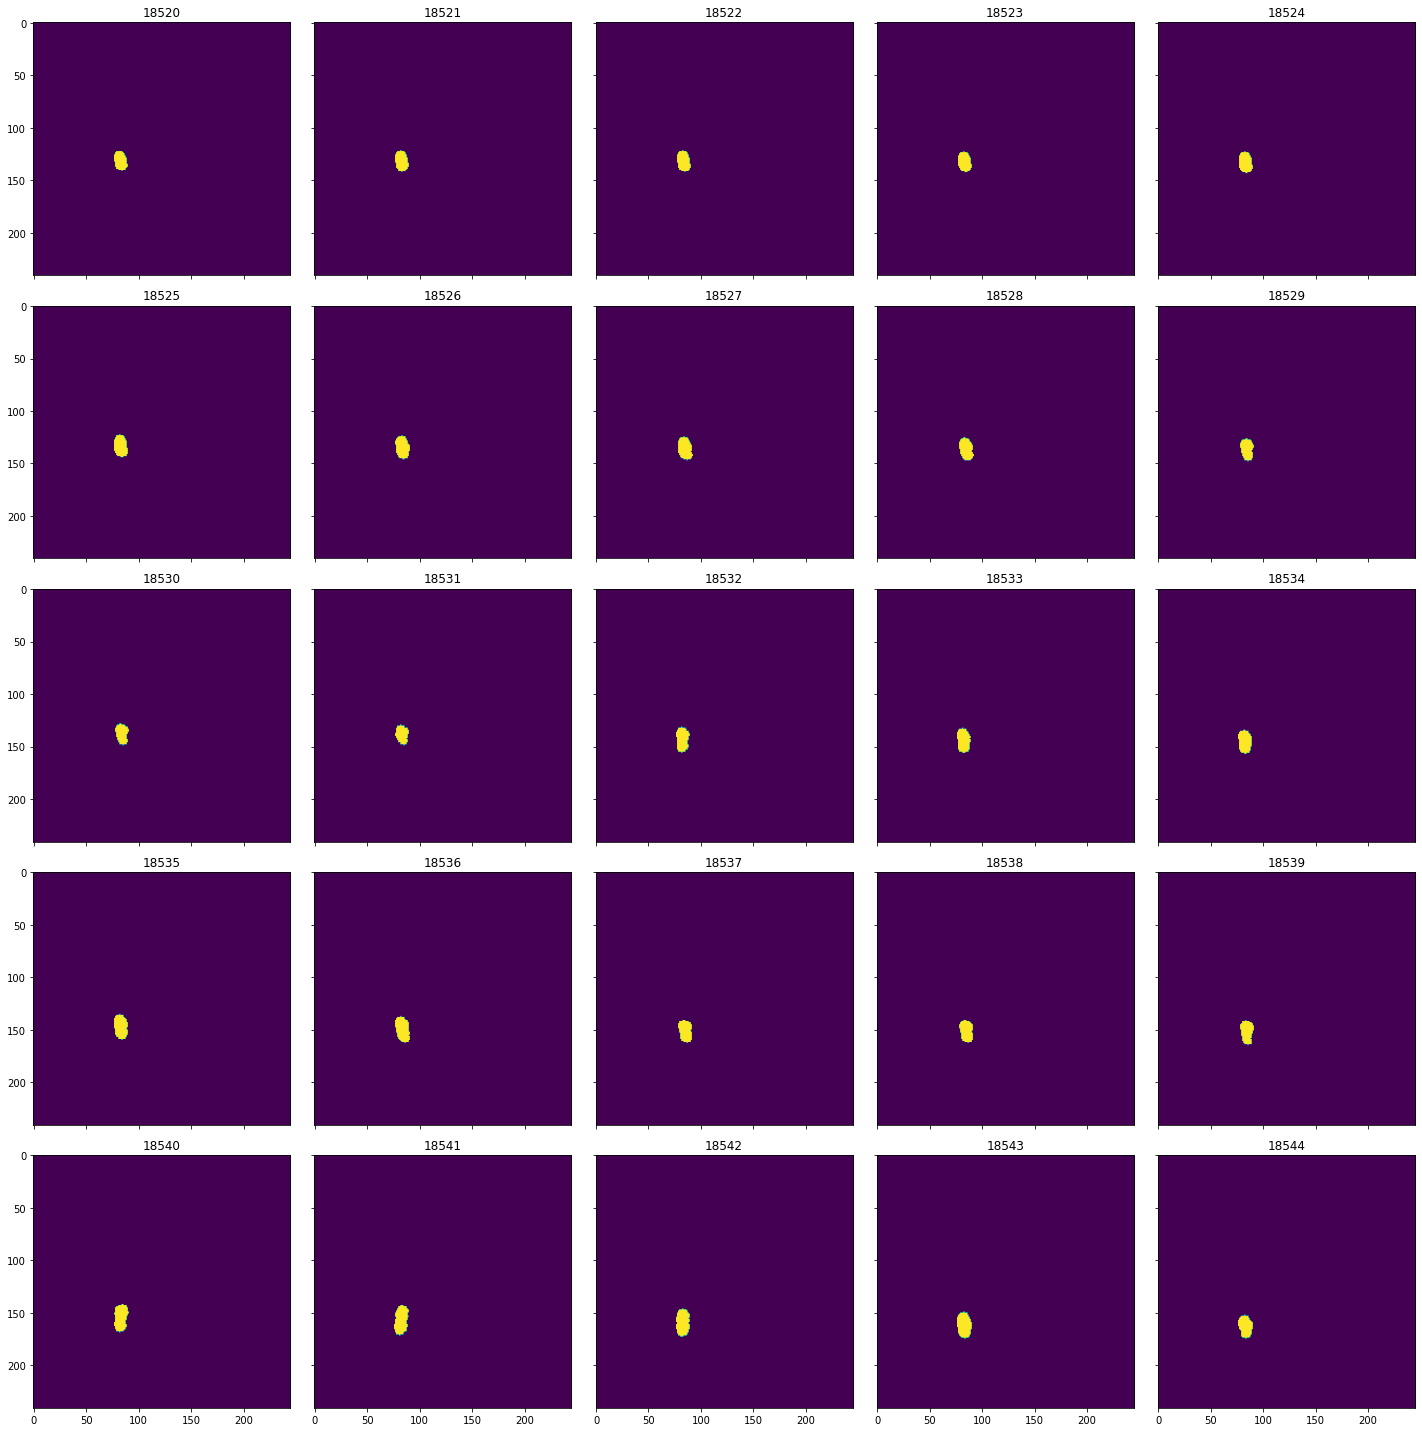

In [18]:
features, masks = get_frame_features(cleaned_frames, progress_bar=False, use_cc=True, frame_threshold=3)
plot_frames(masks, frame_idxs, vmin=None, vmax=None)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

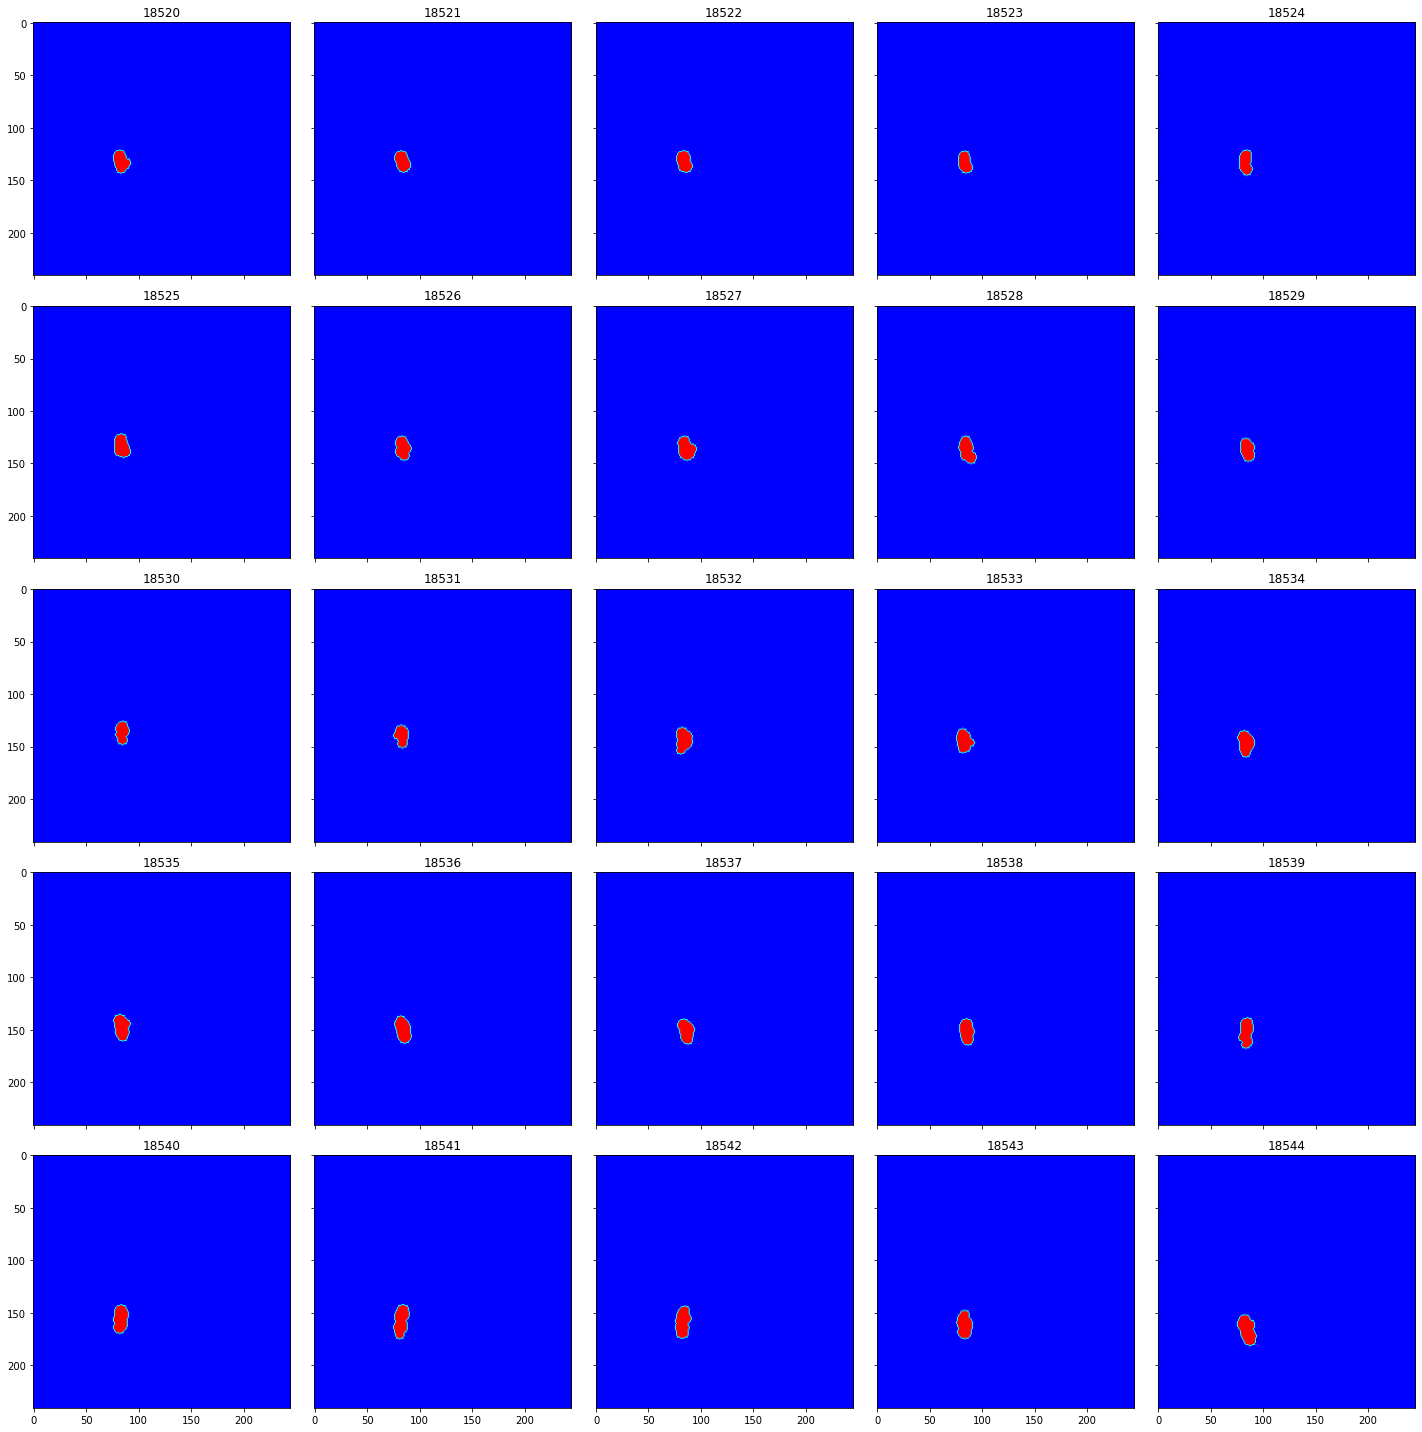

In [14]:
plot_contours(masks, features['contour'], frame_idxs, vmin=0, vmax=1)

In [9]:
features

{'centroid': array([[ 82.57678883, 132.04188482],
        [ 82.75766568, 131.61622156],
        [ 82.86968085, 132.07446809],
        [ 82.78693182, 132.7594697 ],
        [ 82.43474178, 133.23004695],
        [ 82.7977068 , 133.76085176],
        [ 83.51694247, 135.10086682],
        [ 84.34550989, 136.65981735],
        [ 84.40350877, 136.65369947],
        [ 84.03118908, 137.39083821],
        [ 84.14985591, 136.98943324],
        [ 82.875     , 137.30952381],
        [ 81.89802131, 142.76484018],
        [ 81.38455285, 143.69593496],
        [ 82.09285714, 144.85714286],
        [ 83.04415011, 146.86902134],
        [ 83.57898399, 149.38065414],
        [ 84.56872428, 150.94897119],
        [ 84.62297735, 152.28802589],
        [ 83.89655172, 149.5862069 ],
        [ 82.90977961, 154.89807163],
        [ 82.48534799, 156.37545788],
        [ 81.8339719 , 159.10217114],
        [ 82.37250996, 161.5059761 ],
        [ 83.46641318, 164.74904943]]),
 'orientation': array([-1.31163535, 